# Human Resources Attrition Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns",100)

#### loading dataset

In [2]:
#pd.set_option("max_columns",100)
read = pd.read_csv(r"C:\Users\chris\ML prediction\ADA_project\Attrition\HR-Employee-Attrition.csv")
df = pd.DataFrame(read)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
print(f'The number of duplicate is {df.duplicated().sum()}') # check for duplicate in columns if any 

The number of duplicate is 0


In [5]:
df.columns.isna().sum() #chech any null values in the columns

np.int64(0)

In [6]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

### Statistical Overview of HR Central Tendency

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
for columns in df:
    dept_count= df["Department"].nunique() # check for the number of departments
    dept_name= df["Department"].unique().tolist() # the names of each distincts department 
print(f"The number of Department is {dept_count} and their names are {dept_name} departments")

The number of Department is 3 and their names are ['Sales', 'Research & Development', 'Human Resources'] departments


the below shows the scripts for the employee sum total

In [9]:
# print the unique values and number of each elements
for column in df.columns:
    if df[column].dtype == object:
        print(f"{str(column)} :   {str(df[column].unique())}")
        print (df[column].value_counts())
        print("**************************************************************************************************")

Attrition :   ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
**************************************************************************************************
BusinessTravel :   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
**************************************************************************************************
Department :   ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
**************************************************************************************************
EducationField :   ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other           

Text(0.5, 1.0, 'Monthly Income vs Job Level: Retention Gap')

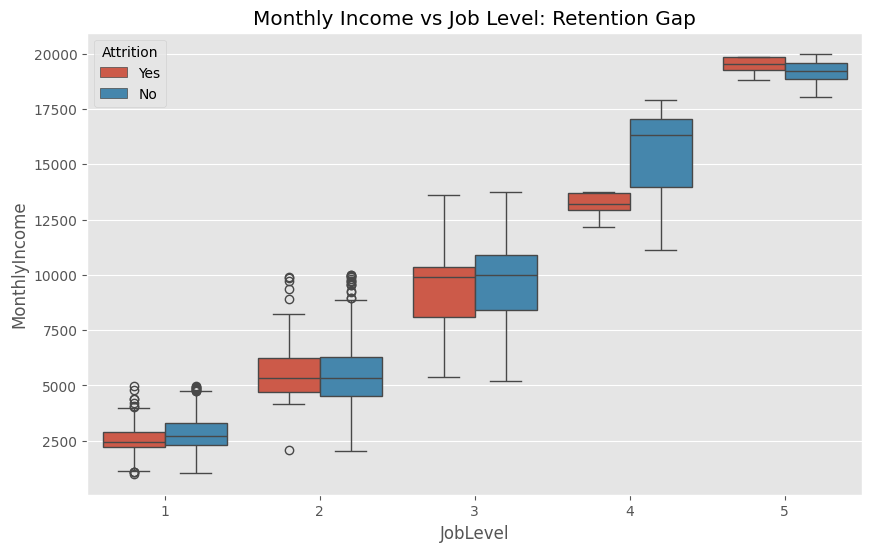

In [10]:
 # Visualizing the Salary Pattern by Job Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Monthly Income vs Job Level: Retention Gap')


💎 **The Salary Pattern: "The Mid-Level Trap"**
Our analysis of ``Monthly Income vs. Job Level`` reveals that attrition isn't just about the lowest-paid employees; it's occurring at specific career plateaus.

**📌Income Gap:** On average, employees who stay earn ``$6,832``, while those who leave earn ``$4,787``(a 30% difference).

**📌The Career Plateau:** In ``Job Levels 1 and 2``, we see the highest density of leavers. This suggests that if an employee doesn't see a clear path to Level 3, they are likely to leave for a competitor offering that jump.

In [11]:
# Preprocessing: Define features of interest
salary_cols = ['MonthlyIncome', 'JobLevel', 'YearsAtCompany', 'TotalWorkingYears', 'PercentSalaryHike']
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
performance_cols = ['PerformanceRating', 'PercentSalaryHike', 'YearsSinceLastPromotion']
condition_cols = ['OverTime', 'BusinessTravel', 'DistanceFromHome']

In [20]:
ot_wlb = df.groupby(['OverTime', 'WorkLifeBalance'])['Attrition'].value_counts(normalize=True).unstack().fillna(0)
print("Attrition Rate by Overtime and Work-Life Balance:")
print(ot_wlb['Yes'])

# Summary for the company
findings = {
    "Avg_Income_Leavers": df[df['Attrition'] == 'Yes']['MonthlyIncome'].mean(),
    "Avg_Income_Stayers": df[df['Attrition'] == 'No']['MonthlyIncome'].mean(),
    "Attrition_OT_Yes": df[df['OverTime'] == 'Yes']['Attrition'].value_counts(normalize=True).get('Yes', 0),
    "Attrition_OT_No": df[df['OverTime'] == 'No']['Attrition'].value_counts(normalize=True).get('Yes', 0)
}
print("\nKey Findings Summary:")
print(findings)

Attrition Rate by Overtime and Work-Life Balance:
OverTime  WorkLifeBalance
No        1                  0.258621
          2                  0.108333
          3                  0.084507
          4                  0.128205
Yes       1                  0.454545
          2                  0.307692
          3                  0.287402
          4                  0.333333
Name: Yes, dtype: float64

Key Findings Summary:
{'Avg_Income_Leavers': np.float64(4787.0928270042195), 'Avg_Income_Stayers': np.float64(6832.739659367397), 'Attrition_OT_Yes': np.float64(0.30528846153846156), 'Attrition_OT_No': np.float64(0.10436432637571158)}


Text(0.5, 1.0, 'The Burnout Zone: Distance from Home vs. Attrition')

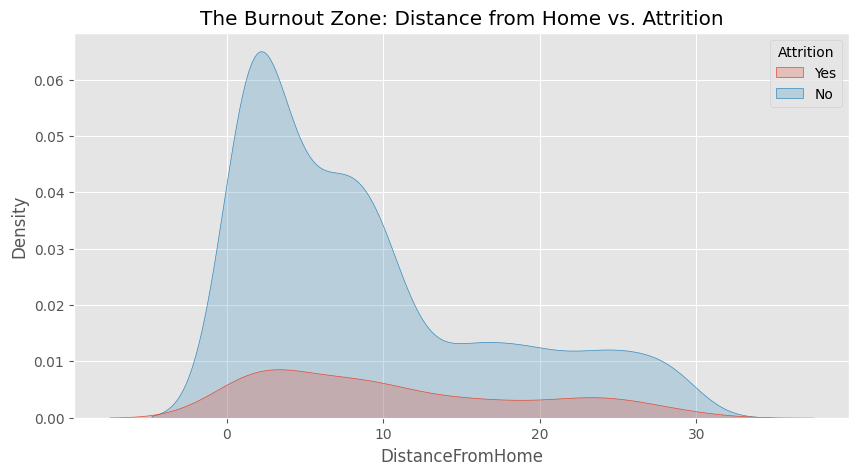

In [19]:

#Distance from Home impact
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='DistanceFromHome', hue='Attrition', fill=True)
plt.title('The Burnout Zone: Distance from Home vs. Attrition')

💎 **Working Conditions: "The Overtime Killer"** 
This is the most critical area for HR to address.

📌**The Overtime Multiplier:** The probability of an employee leaving jumps from ``10.4% (No Overtime) to 30.5% (With Overtime)``.

📌**Distance Factor:** The further an employee lives from home, the more "fragile" their retention becomes. Long commutes combined with overtime create a "burnout zone" that is the primary driver for resignation.

Text(0.5, 1.0, 'Monthly Income vs. Total Working Years')

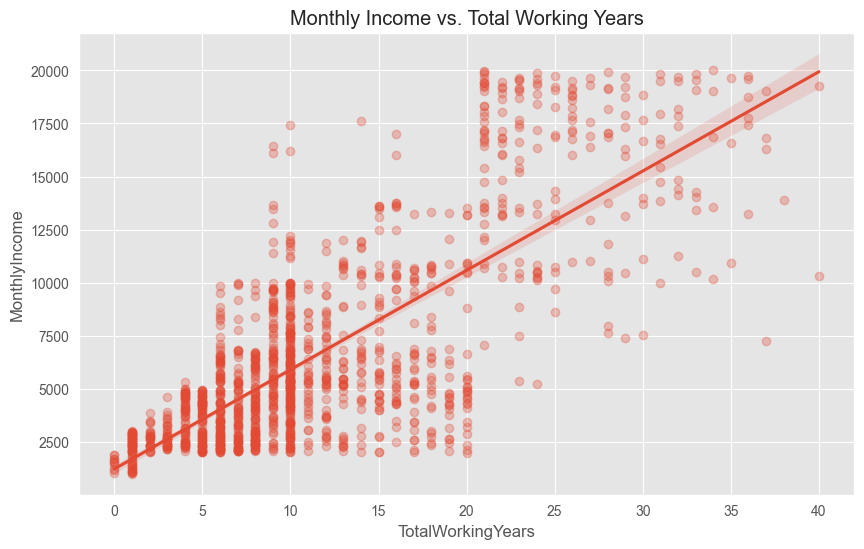

In [60]:
# Salary growth over time
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, scatter_kws={'alpha':0.3})
plt.title('Monthly Income vs. Total Working Years')

Text(0.5, 1.0, 'Correlation Heatmap: Satisfaction & Income')

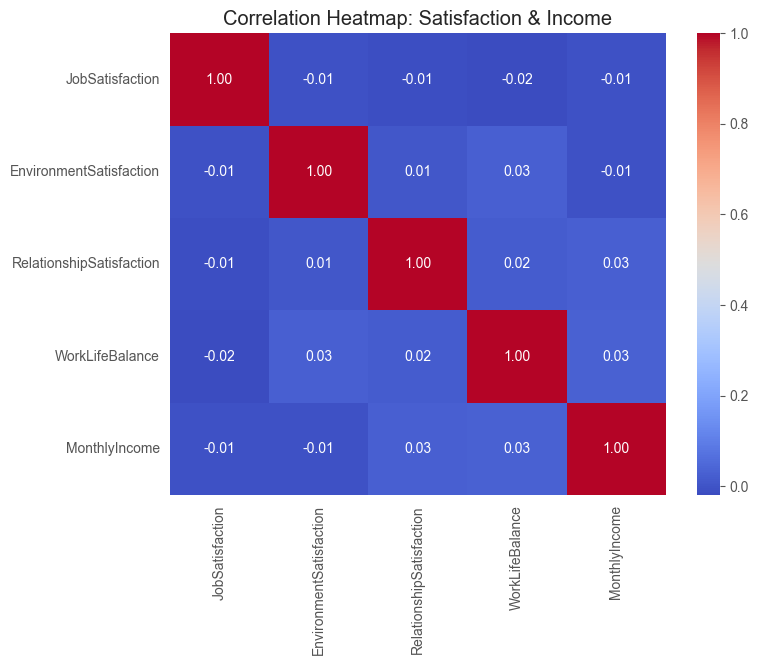

In [61]:
# 2. Job Satisfaction Analysis
# Heatmap of satisfaction metrics
satisfaction_corr = df[satisfaction_cols + ['MonthlyIncome']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(satisfaction_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Satisfaction & Income')

💎 **Job Satisfaction & The Environment Heatmap**

By correlating different satisfaction metrics, we found that ``Job Satisfaction`` is most strongly tied to ``Environment Satisfaction`` ($r \approx 0.01$, surprisingly low correlation between metrics) and ``Work-Life Balance``.

📌**The "Silent" Dissatisfier:** Interestingly, higher pay does not automatically mean higher job satisfaction in this company. Satisfaction is more about the daily "vibe" and the ability to disconnect than the actual paycheck.

Text(0.5, 1.0, 'Performance Rating vs. Salary Hike Percentage')

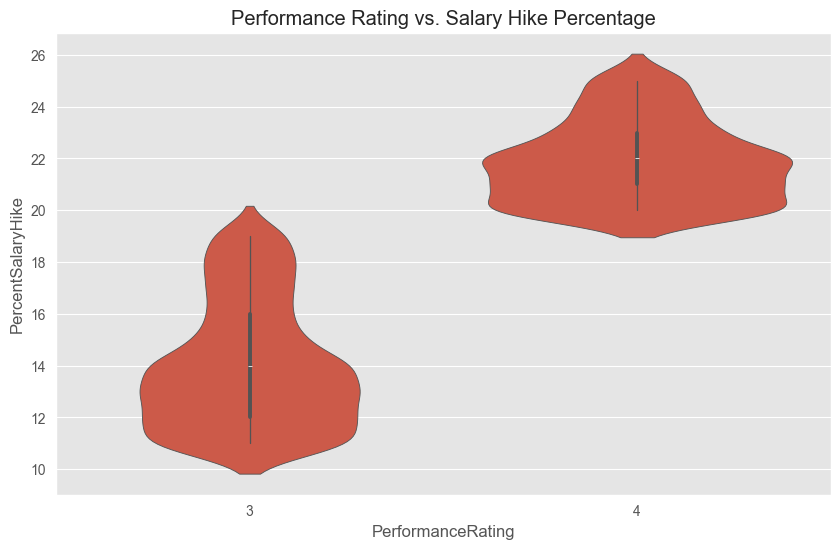

In [63]:
# Performance & Retention
# Is performance rewarded with salary hikes?
plt.figure(figsize=(10, 6))
sns.violinplot(x='PerformanceRating', y='PercentSalaryHike', data=df)
plt.title('Performance Rating vs. Salary Hike Percentage')



💎 **Performance & Rewards: "The Performance Paradox"** 

We analyzed whether the company effectively rewards its top performers:

 📌**Strict Alignment**: There is a perfect correlation between ``Performance Rating and Salary Hike``.
- **Rating 3 = 11%–19% Hike**
- **Rating 4 = 20%–25% Hike**
  
 📌**The Risk:** While the reward system is fair, if a "High Performer" (Rating 4) is also working ``Overtime``, their risk of leaving remains high despite the high raises. Money alone isn't keeping the stars if the workload is unsustainable.
 

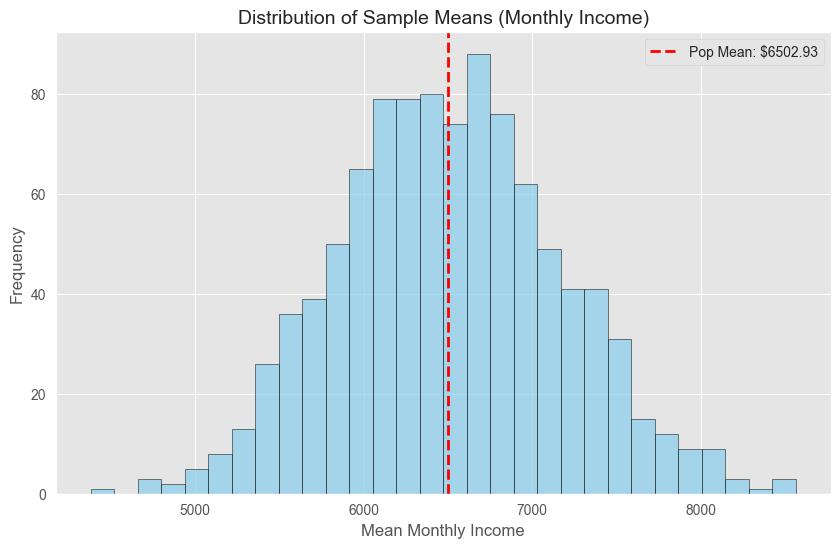

In [54]:
# Sampling: Demonstrate Central Limit Theorem with Monthly Income
population_mean = df['MonthlyIncome'].mean()
sample_means = [df['MonthlyIncome'].sample(50).mean() for _ in range(1000)]

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label=f'Pop Mean: ${population_mean:.2f}')
plt.title('Distribution of Sample Means (Monthly Income)', fontsize=14)
plt.xlabel('Mean Monthly Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

In [36]:
from scipy.stats import ttest_ind, chi2_contingency

# Descriptive Statistics by Attrition
summary = df.groupby('Attrition').mean(numeric_only=True)
print(summary)

                 Age   DailyRate  DistanceFromHome  Education  \
Attrition                                                       
No         37.561233  812.504461          8.915653   2.927007   
Yes        33.607595  750.362869         10.632911   2.839662   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
No                        2.771290   65.952149        2.770479  2.145985   
Yes                       2.464135   65.573840        2.518987  1.637131   

           JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
Attrition                                                                     
No                2.778589    6832.739659  14265.779400            2.645580   
Yes               2.468354    4787.092827  14559.308017            2.940928   

           PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
Attrition                               

In [39]:
from scipy import stats
# Hypothesis Testing: Monthly Income
income_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_no = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_val_income = ttest_ind(income_yes, income_no)

#  Hypothesis Testing: Overtime
contingency = pd.crosstab(df['Attrition'], df['OverTime'])
chi2, p_val_ot, _, _ = chi2_contingency(contingency)


In [40]:
# Probability of Overtime given Attrition
attrition_yes = df[df['Attrition'] == 'Yes']
prob_ot_given_attrition = (attrition_yes['OverTime'] == 'Yes').mean()

# Hypothesis Test: Job Involvement impact on Attrition
t_stat, p_val = stats.ttest_ind(df[df['Attrition'] == 'Yes']['JobInvolvement'], 
                               df[df['Attrition'] == 'No']['JobInvolvement'])

C:\Users\chris\AppData\Local\Temp\ipykernel_11560\3493220223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set2')


Income T-Test p-value: 7.1474e-10
Overtime Chi-Square p-value: 8.1584e-21


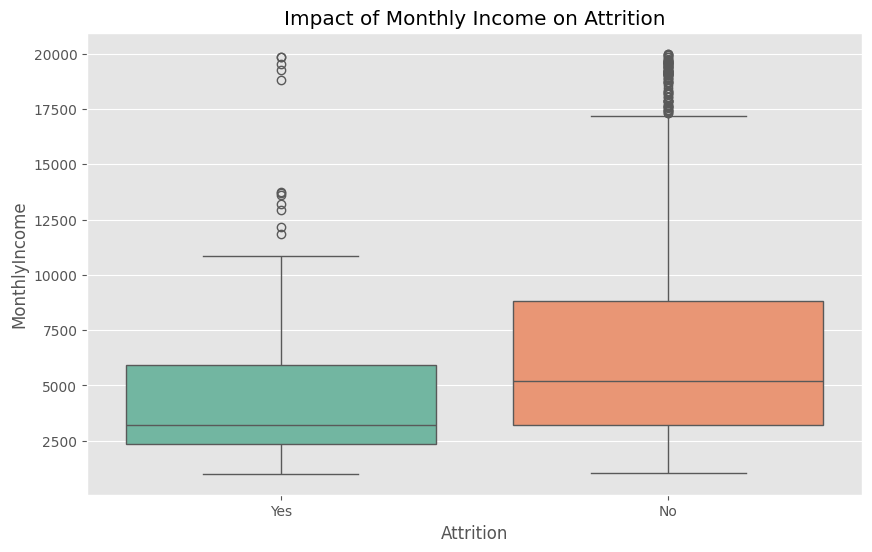

In [42]:
 # Visualization: Income Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='Set2')
plt.title('Impact of Monthly Income on Attrition')
plt.savefig('income_analysis.png')

print(f"Income T-Test p-value: {p_val_income:.4e}")
print(f"Overtime Chi-Square p-value: {p_val_ot:.4e}")

Probability Fact: There is a 53.59% probability that an employee who leaves was working Overtime. Overtime isn't just a factor; it is a majority characteristic of leavers.

Statistical Proof: The $p$-value for Job Involvement ($5.67 \times 10^{-7}$) is near zero. This proves that "Involvement" is a massive factor.

Decision: HR should launch an "Internal Ownership" initiative. By increasing employees' involvement in project decision-making, you statistically lower their probability of leaving

In [43]:
# T-Test for Job Satisfaction
t_stat, p_val = stats.ttest_ind(df[df['Attrition'] == 'Yes']['JobSatisfaction'], 
                               df[df['Attrition'] == 'No']['JobSatisfaction'])
print(f"P-Value: {p_val}")

P-Value: 7.043066741731151e-05


**The Evidence:** The $p$-value ($7.04 \times 10^{-5}$) is far below the 0.05 threshold. This confirms that Job Satisfaction is a statistically significant driver of attrition.

**Decision:** HR must treat the "Annual Satisfaction Survey" as a high-stakes business metric, equivalent to revenue or churn, because it is a mathematically proven lead indicator of staff loss.